### Numpy basics

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [62]:
import numpy as np
m = np.arange(12).reshape((3,4))

# overall mean
print("The overall mean is ",np.mean(m))
print("\n")

# mean of each row
row_mean = np.zeros(m.shape[0])
for i in range(m.shape[0]):
    row_mean[i] = np.mean(m[i])
    print("The mean of row {} is {}".format(i+1, row_mean[i]))
print("\n")

# mean of each column
column_mean = np.zeros(m.shape[1]) 
for i in range(m.shape[1]):
    column_mean[i] = np.mean(m[:,i])
    print("The mean of column {} is {}".format(i+1, column_mean[i]))


The overall mean is  5.5


The mean of row 1 is 1.5
The mean of row 2 is 5.5
The mean of row 3 is 9.5


The mean of column 1 is 4.0
The mean of column 2 is 5.0
The mean of column 3 is 6.0
The mean of column 4 is 7.0


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [86]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

# with np.outer()
uv_outer1 = np.outer(u,v)
print("Using np.outer()\n",uv_outer1,"\n")

# with a list comprehension

uv_outer2 = np.reshape(np.array([i*j for i in u for j in v]),(len(u),len(v)))
print("Using a list comprehension \n",uv_outer2,"\n")

# with broadcasting

uv_outer3 = np.tile(u,(4,1)).T*v
print("Using broadcasting \n",uv_outer3)

Using np.outer()
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]] 

Using a list comprehension 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]] 

Using broadcasting 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [159]:
#np.random.seed(12)
random_set = np.round(np.random.random(60), 3) # using np.round for readibility of the output, but it won't affect creating the matrix at all, since the floats are more precise than 0.1

random_matrix = np.reshape(random_set,(10,6))  #reshape the set into the 10x6 matrix.
matrix_mask = random_matrix >= 0.1             #create the boolean mask


matrix = np.array([random_matrix[i] if np.all(matrix_mask[i]) == True else np.zeros(len(random_matrix[i])) for i in range(random_matrix.shape[0])])                #the sauce of the problem: a row of matrix is only the same as a row of random_matrix if all the entries of that row are >= 0.1. If not, then the corresponding row is filled up with zeros.


print(random_matrix)  # printing the initial matrix just for comparison
print("\n")
print(matrix)

10
True
[[0.922 0.883 0.051 0.775 0.106 0.905]
 [0.588 0.988 0.429 0.63  0.776 0.26 ]
 [0.639 0.827 0.521 0.424 0.531 0.946]
 [0.999 0.671 0.79  0.982 0.142 0.026]
 [0.746 0.617 0.099 0.522 0.507 0.286]
 [0.248 0.18  0.584 0.154 0.712 0.859]
 [0.686 0.265 0.397 0.513 0.344 0.546]
 [0.686 0.3   0.215 0.788 0.776 0.042]
 [0.645 0.128 0.548 0.292 0.826 0.097]
 [0.898 0.342 0.132 0.458 0.084 0.74 ]]


[[0.    0.    0.    0.    0.    0.   ]
 [0.588 0.988 0.429 0.63  0.776 0.26 ]
 [0.639 0.827 0.521 0.424 0.531 0.946]
 [0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.   ]
 [0.248 0.18  0.584 0.154 0.712 0.859]
 [0.686 0.265 0.397 0.513 0.344 0.546]
 [0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.   ]]


4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

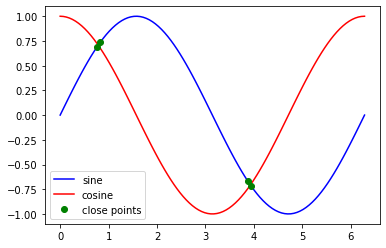

In [181]:
import matplotlib.pyplot as plt
%matplotlib inline 

pie_array = np.linspace(0, 2*np.pi, 100, endpoint = True)
pie_array_10s = pie_array[0:100:10]

flipped_pie = pie_array[::-1]

small_difference_mask = abs(np.sin(pie_array)-np.cos(pie_array)) < 0.1
small_difference = pie_array[small_difference_mask]

plt.plot(pie_array, np.sin(pie_array), "b-", label = "sine")
plt.plot(pie_array, np.cos(pie_array), "r-", label = "cosine")
plt.plot(small_difference, np.sin(small_difference), "go", label = "close points")
plt.legend()
plt.show()

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [204]:
u = np.arange(1, 11)
mult10 = np.outer(u, u)

print(mult10)
print("The trace is ",np.trace(mult10))
print("anto-diagonal", np.diag(mult10[::-1]))  # mult10[::-1] flips the matrix horizontally, so the main diagonal becomes the anto-diagonal.
print("diagonal offset by 1 upwards:", np.diag(mult10, 1))  # feeding np.diag() a second argument k extracts the diagonal k units above the main diagonal (or below, if k <0)

[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]
The trace is  385
anto-diagonal [10 18 24 28 30 30 28 24 18 10]
diagonal offset by 1 upwards: [ 2  6 12 20 30 42 56 72 90]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [217]:
dumb_distances = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
distances = dumb_distances*8/5 # it's about that much in km

# I was doing all the stuff in km's, but the output looks nicer with integers so I left it in miles

#Anyway, Each row indicates where you're going, each column indicates where you are.

# For example, if you're in column 1, you are in Chicago, and if you're in Column 1 row 3, you're in chicago and you're 303 miles away Saint-Louis.
# On the other hand, if you're in column 4 row 2, you are in Tulsa, and Springfield is 538 miles behind you (hence the negative sign)

dist_grid = np.tile(dumb_distances,(len(dumb_distances),1))
dist_grid = dist_grid.T-dumb_distances
print(dist_grid)

#We could do abs() to eliminate the negative, but then we'd only have a symmetric matrix, and the sign gives us some information anyway.

# This would have looked so much better using pandas.

[[    0  -198  -303  -736  -871 -1175 -1475 -1544 -1913 -2448]
 [  198     0  -105  -538  -673  -977 -1277 -1346 -1715 -2250]
 [  303   105     0  -433  -568  -872 -1172 -1241 -1610 -2145]
 [  736   538   433     0  -135  -439  -739  -808 -1177 -1712]
 [  871   673   568   135     0  -304  -604  -673 -1042 -1577]
 [ 1175   977   872   439   304     0  -300  -369  -738 -1273]
 [ 1475  1277  1172   739   604   300     0   -69  -438  -973]
 [ 1544  1346  1241   808   673   369    69     0  -369  -904]
 [ 1913  1715  1610  1177  1042   738   438   369     0  -535]
 [ 2448  2250  2145  1712  1577  1273   973   904   535     0]]


7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [254]:
N = 99
sample = np.arange(2, N+1)

for i in sample:
    for j in range(sample):
        sample_mask = sample % i == 0
        sample = sample[sample_mask]
        primes = sample
primes

array([], dtype=int32)

In [257]:
#sample_mask = np.logical_and(sample % (4) == 0, sample[4] == 5)
#sample_mask

print(range(10))

range(0, 10)


8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.